In [12]:
import numpy as np
import scipy.stats as stats
from scipy.stats import uniform

In [13]:
''' Estimate the value of the integral as a function of sample size. Use sample sizes of 1000, 2000, ..., 50000
'''

np.random.seed(0)

#Integral cosx = 2 * E(cosx)

mcos_estimates = [None] * 50
mcos_std = [None] * 50

for samples in range(1,51):
    unif_array = uniform.rvs(size = samples*1000) * 2
    cos_val = np.cos(unif_array) * 2
    mcos_estimates[samples-1] = np.mean(cos_val)
    mcos_std[samples-1] = np.std(cos_val) / np.sqrt(samples*1000)
    




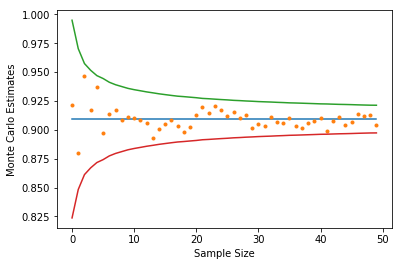

Analytical Value of Integral : 0.9092974268256817
Estimated Value of Integral : 0.9045239607791388


In [22]:
'''Plot the estimates against the analytical value of the integral.
'''

import matplotlib.pyplot as plt
analytical_value = np.sin(2)
plt.plot([analytical_value] * 50)
plt.plot(mcos_estimates,'.')
plt.plot(analytical_value + np.array(mcos_std) * 3)
plt.plot(analytical_value - np.array(mcos_std) * 3)
plt.xlabel("Sample Size")
plt.ylabel("Monte Carlo Estimates")
plt.show()

print("Analytical Value of Integral : {}".format(np.sin(2)))
print("Estimated Value of Integral : {}".format(mcos_estimates[49]))

In [15]:
#Part 2 Price European Put Option

#Initialize Variables 
'''
Share volatility is 30%
The risk-free rate is 10%
Average share return is 15%
The current share price is $100
The strike on the European put option is $110
The term of the contract is 6 months'''
Sigma = 0.3
r = 0.1
S0 = 100
K = 110
T = 0.5

In [16]:
'''1.Write a function which takes a risk-free rate, the initial share price, the share volatility, and term as inputs, and 
determines the terminal value of a share price, assuming geometric Brownian Motion. 
'''

def find_terminal_price(r,S0,Sigma,T,Z):
    return S0 * np.exp((r - Sigma**2/2) * T + Sigma * np.sqrt(T) * Z)


In [17]:
'''2. Write a function which takes terminal share prices, a strike price, a risk-free rate and term as inputs, and 
gives out the discounted value of a European put option
'''

def calculate_discounted_value(terminal,K,r,T):
    payoff = np.maximum(K - terminal,0)
    price_put = np.exp(-r * T) * payoff
    return price_put

In [20]:
'''3. Write a for loop which cycles through sample size (1000, 2000, ..., 50000), and calculates the Monte Carlo estimate of a 
European put option, and well as the standard deviation of the Monte Carlo estimator.'''

estimated_price = [None] * 50
std_price = [None] * 50
for samples in range(1,51):
    Z = stats.norm.rvs(size = samples * 1000)
    terminal = find_terminal_price(r,S0,Sigma,T,Z)
    price = calculate_discounted_value(terminal,K,r,T)
    estimated_price[samples - 1] = np.mean(price)
    std_price[samples - 1] = np.std(price) / np.sqrt(samples * 1000)

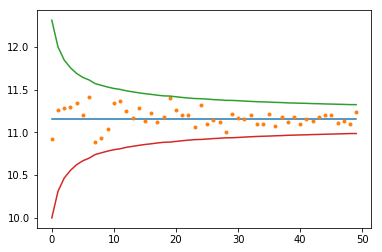

Put Option Analytical Price : 11.15601933481286
Estimated Value of Analytical Price : 11.238116908502269


In [21]:
'''4.Plot the Monte Carlo estimates, the analytical European put option value, and three standard deviation error bounds. Note that the analytical put value 
is given by:'''
t = 0
phi = stats.norm.cdf
d1 = (np.log(S0/K) + (r + Sigma**2/2) * (T-t)) / (Sigma * np.sqrt(T-t))
d2 = d1 - Sigma * np.sqrt(T)
put_option_analytical_price = K * np.exp(-r * (T-t)) * phi(-d2) - S0 * phi(-d1)

plt.plot([put_option_analytical_price] * 50)
plt.plot(estimated_price,'.')
plt.plot(put_option_analytical_price + 3 * np.array(std_price))
plt.plot(put_option_analytical_price - 3 * np.array(std_price))
plt.show()

print("Put Option Analytical Price : {}".format(put_option_analytical_price))
print("Estimated Value of Analytical Price : {}".format(estimated_price[49]))